# Clustering with *k*-means

 - Elwin van 't Wout
 - 8 August 2025
 - Pontificia Universidad Católica de Chile

The algorithm *k*-means is one of the most popular methods for clustering of datasets. Although it is available in the scikit-learn library, it is instructive to program the algorithm and see how it works step by step. This notebook is an example implementation for educational purposes and is not necessarily the *best* way to program the algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Let us create a dataset with points located randomnly inside a given number of blobs.

In [2]:
n_points = 20000
print("Number of data points:", n_points)

Number of data points: 20000


In [3]:
# set the seed for reproducibility
np.random.seed(0)

In [4]:
from sklearn.datasets import make_blobs
n_clusters = 3
dataset, _ = make_blobs(n_samples=n_points, n_features=2, centers=n_clusters)
print("Created a dataset that represents", n_clusters, "clusters in", dataset.shape[1], "dimensions.")

Created a dataset that represents 3 clusters in 2 dimensions.


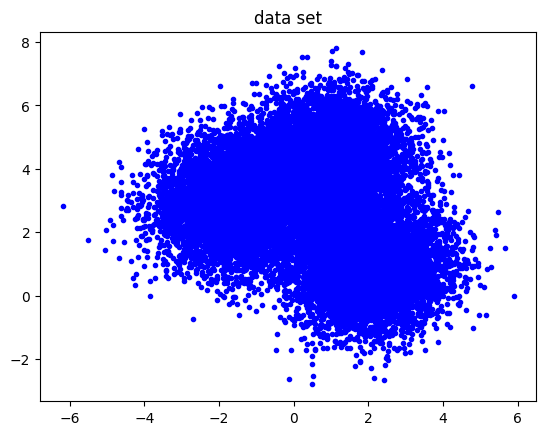

In [5]:
plt.plot(dataset[:,0], dataset[:,1], 'b.')
plt.title('data set')
plt.show()

The *k*-means algorithm is an iterative method that searches for *k* clusters. Each cluster is represented by a center, and all points are assigned to the closest center in space.

As for all iterative methods, an initial guess must be provided. Here, the starting centers are uniformly distributed on the line $0<x<1$ and $y=0$.

In [6]:
k = 7
print("Number of clusters:", k)

Number of clusters: 7


In [7]:
centers = np.zeros([k, 2])
for c in range(k):
    centers[c,0] = float(c+1)/(k+1)
    centers[c,1] = 0.0

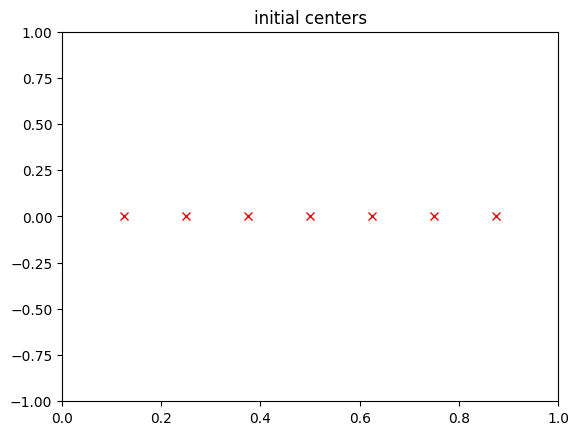

In [8]:
plt.plot(centers[:,0], centers[:,1], 'rx')
plt.xlim([0,1])
plt.ylim([-1,1])
plt.title('initial centers')
plt.show()

The *k*-means algorithm iteratively improves the center locations, mainly through two steps.

 1. The assignment step loops over all data points and searches for the closest center. Each data point is labelled with the closest center, that is, its cluster.

 1. The update step calculates the center of mass of each cluster. This will be the new center of this cluster.

These two steps are repeated until the clusters do not change anymore, or when the maximum number of iteration specified is reached.

In [9]:
max_iterations = 1000

In [10]:
%%time

# store the history of centers and clusters
history_of_centers = [centers]
history_of_clusters = []

for iteration in range(max_iterations):
    
    old_centers = history_of_centers[-1]

    # assignment step
    cluster = np.zeros(n_points, dtype='int')
    for p in range(n_points):
        minimum_distance = np.inf
        nearest_cluster = None
        for c in range(k):
            distance_to_cluster_c = np.sqrt((dataset[p,0] - old_centers[c,0])**2 + (dataset[p,1] - old_centers[c,1])**2)
            if distance_to_cluster_c < minimum_distance:
                minimum_distance = distance_to_cluster_c
                nearest_cluster = c
        cluster[p] = nearest_cluster
    history_of_clusters.append(cluster)
    
    # check convergence
    if iteration > 0:
        clusters_changed = False
        for p in range(n_points):
            if history_of_clusters[-1][p] != history_of_clusters[-2][p]:
                clusters_changed = True
        if not clusters_changed:
            print("Converged in", iteration, "iterations.\n")
            break

    # update step
    number_of_points_in_cluster = np.zeros(k, dtype='int')
    sum_of_locations = np.zeros([k, 2], dtype='float')
    for p in range(n_points):
        number_of_points_in_cluster[cluster[p]] += 1
        sum_of_locations[cluster[p], :] += dataset[p, :]
    new_centers = np.zeros([k, 2], dtype='float')
    for c in range(k):
        new_centers[c,0] = sum_of_locations[c,0] / number_of_points_in_cluster[c]
        new_centers[c,1] = sum_of_locations[c,1] / number_of_points_in_cluster[c]
    history_of_centers.append(new_centers)

if iteration == max_iterations-1:
    print("The algorithm did not converge in", max_iterations, "iterations.")

Converged in 69 iterations.

CPU times: user 25.6 s, sys: 8.49 ms, total: 25.6 s
Wall time: 25.6 s


Let us visualize the clusters.

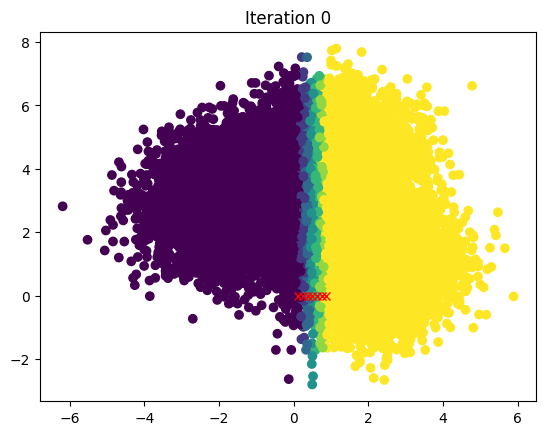

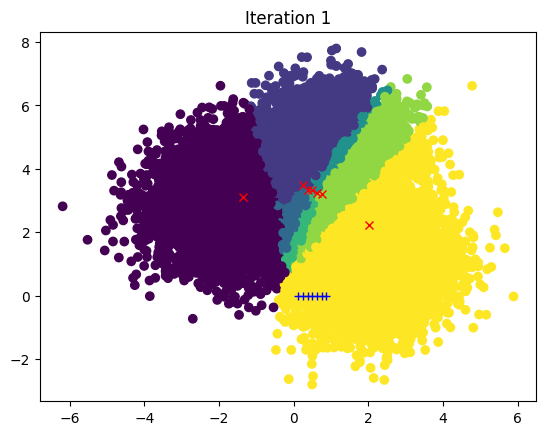

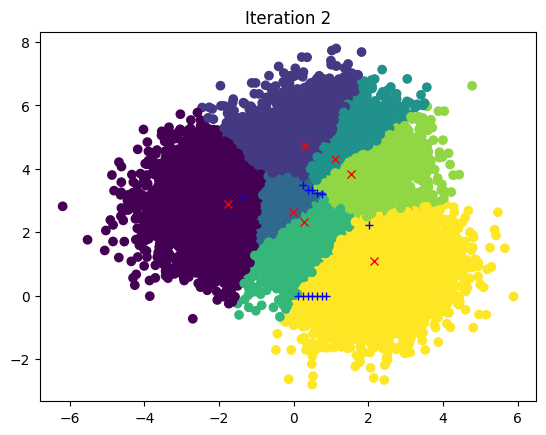

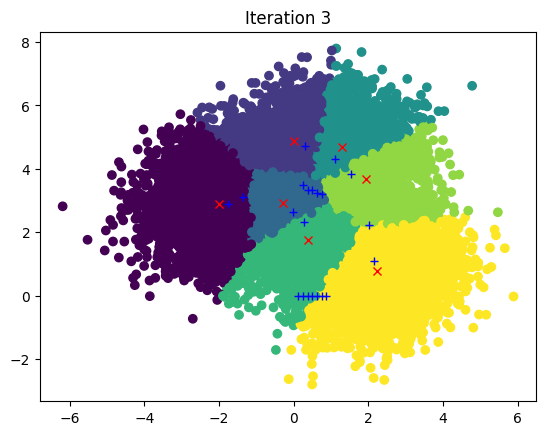

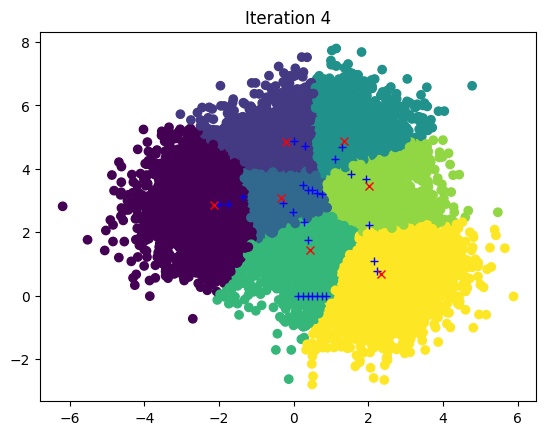

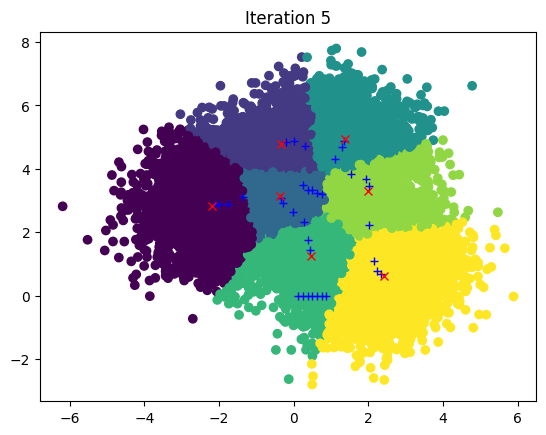

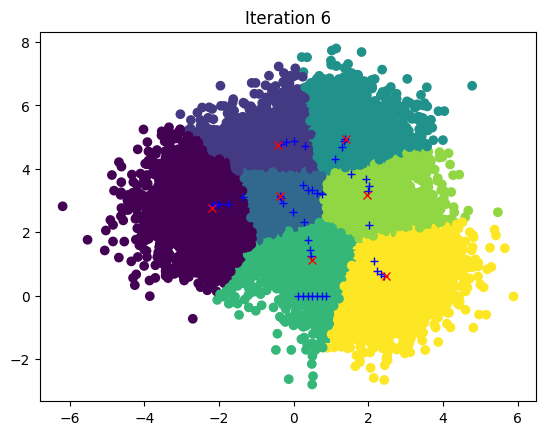

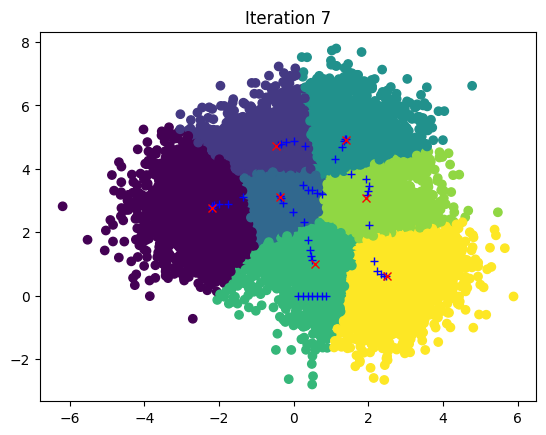

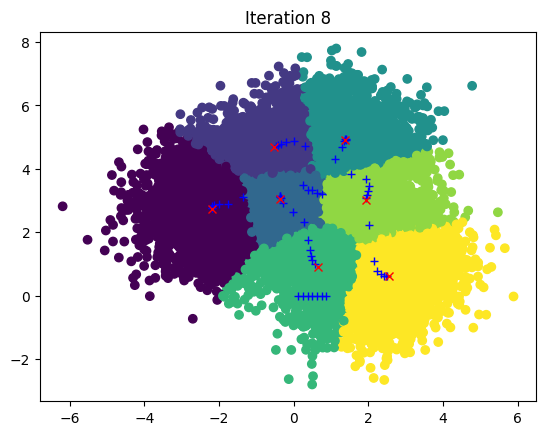

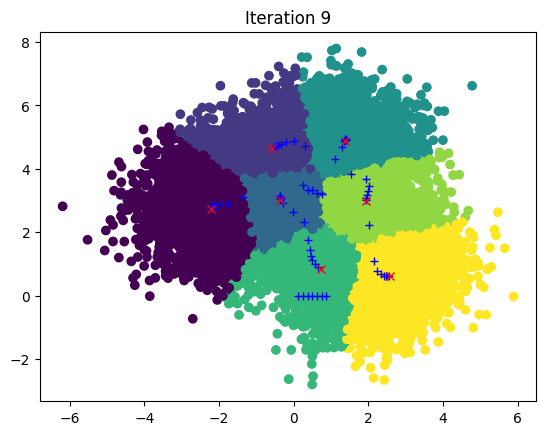

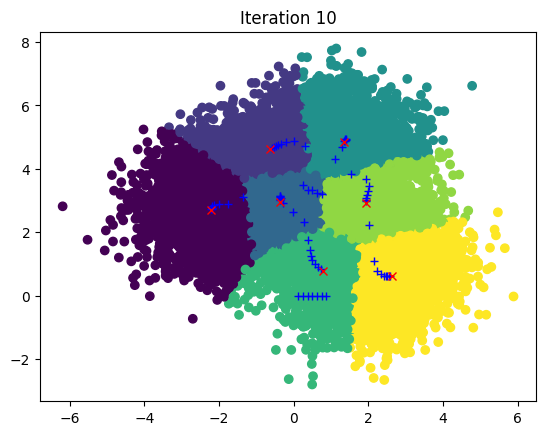

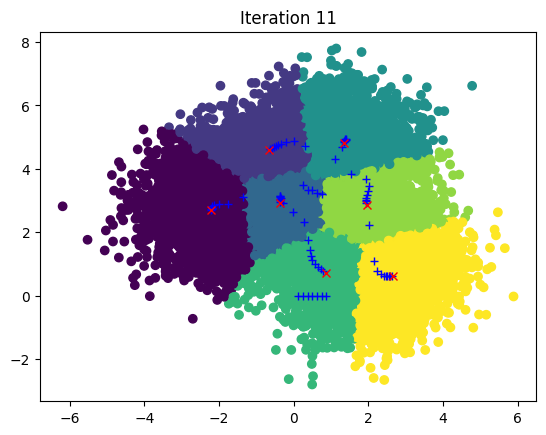

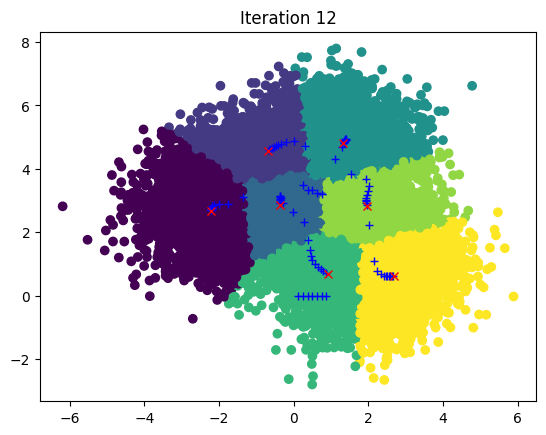

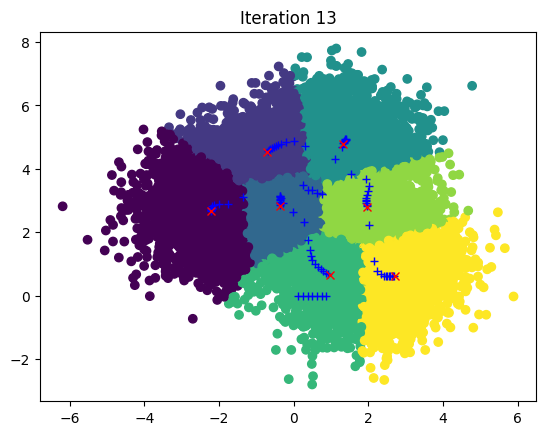

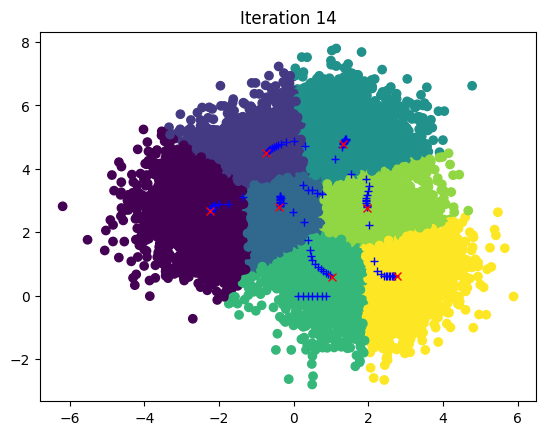

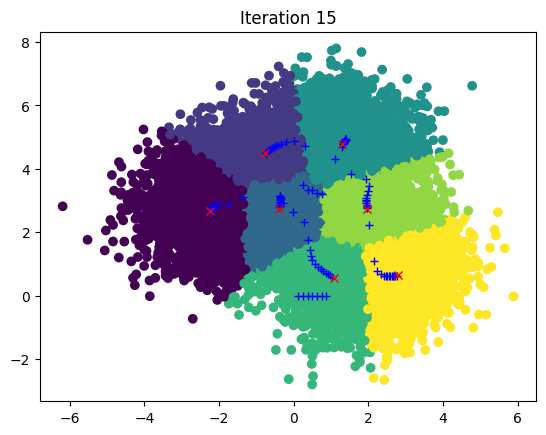

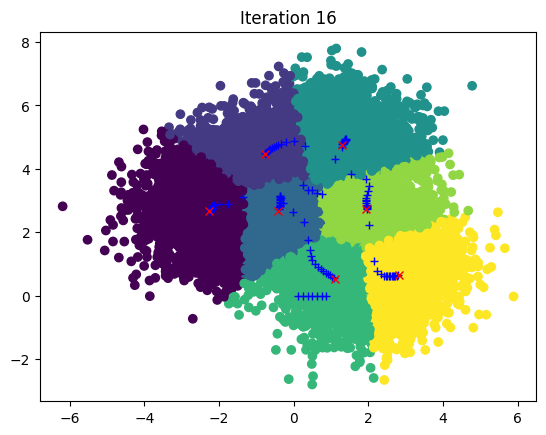

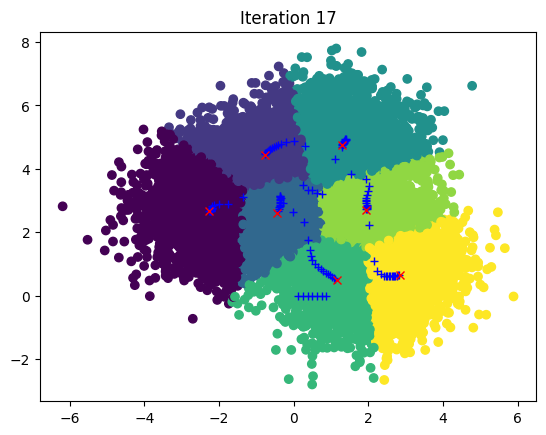

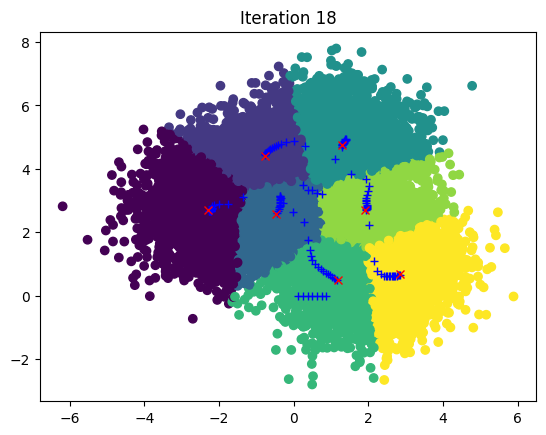

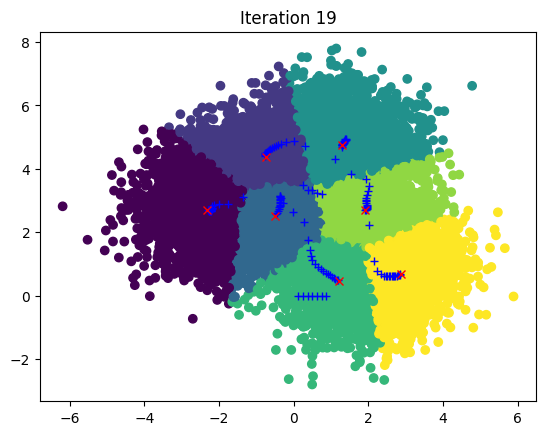

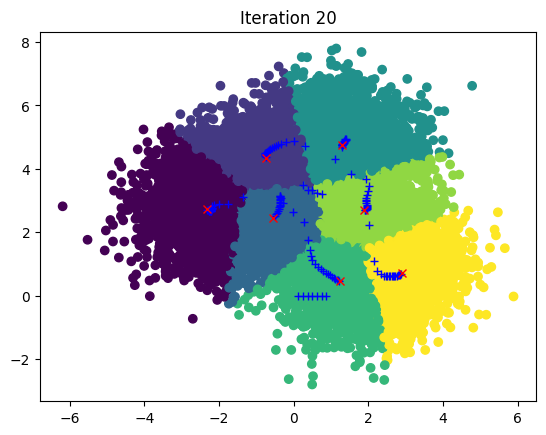

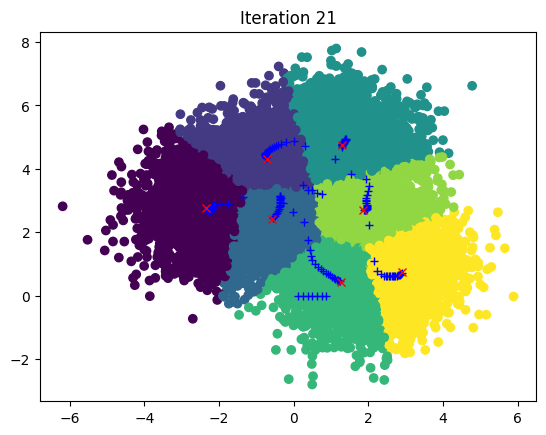

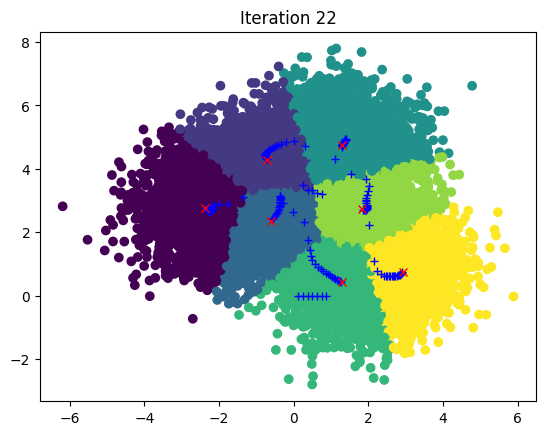

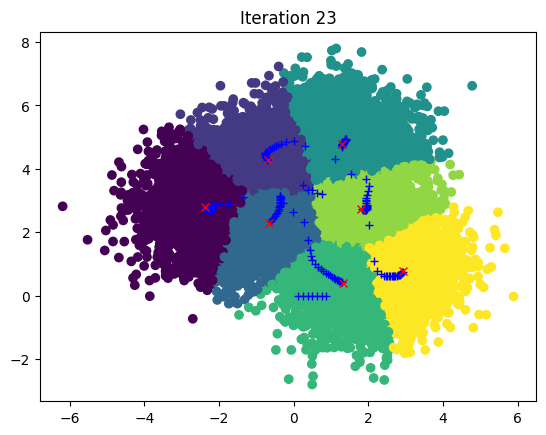

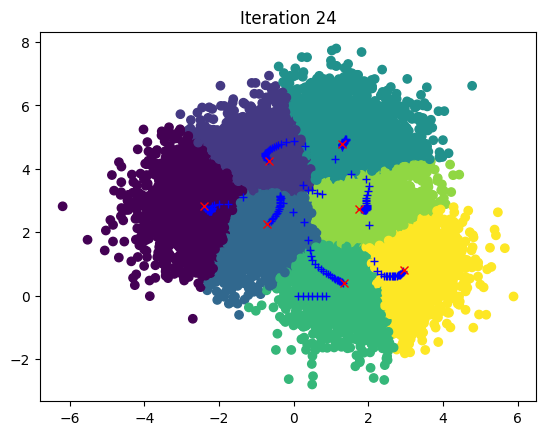

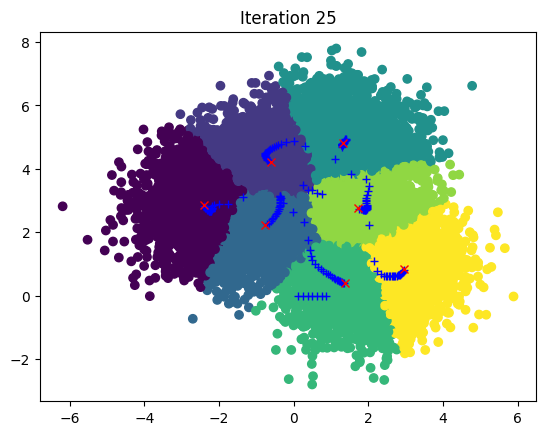

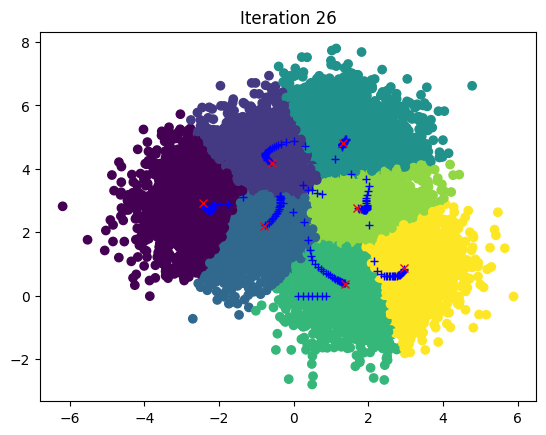

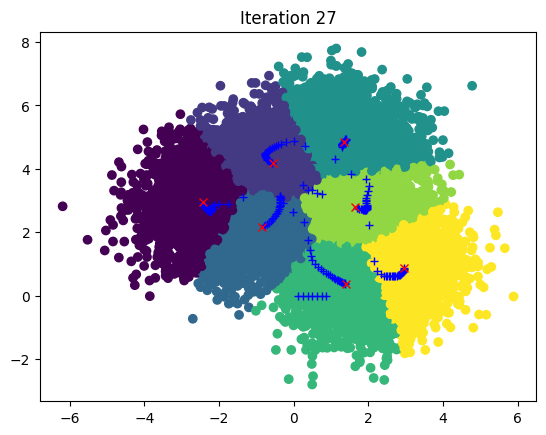

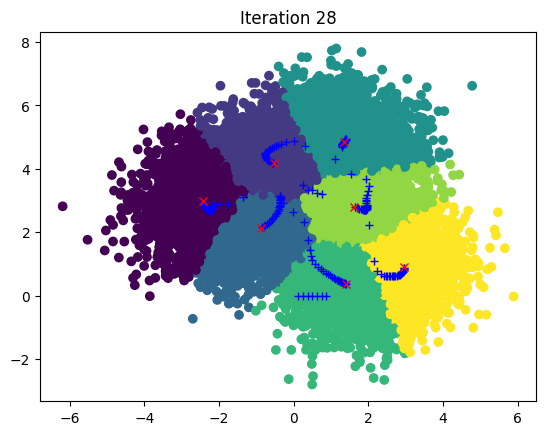

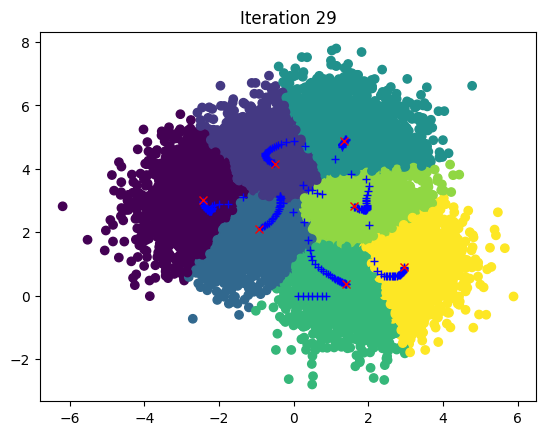

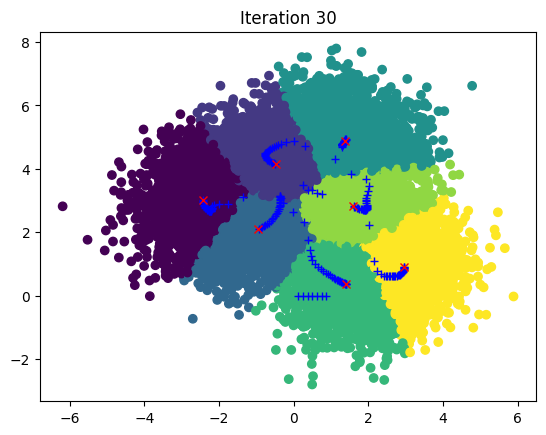

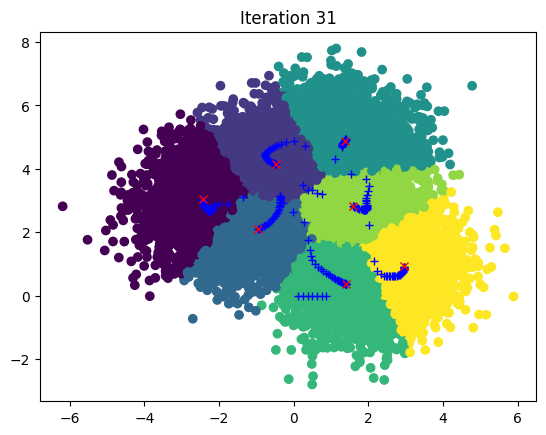

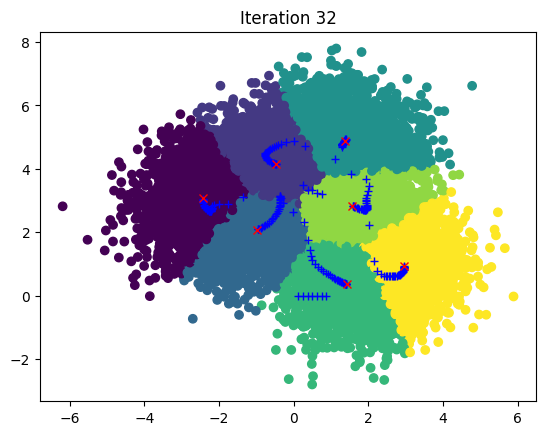

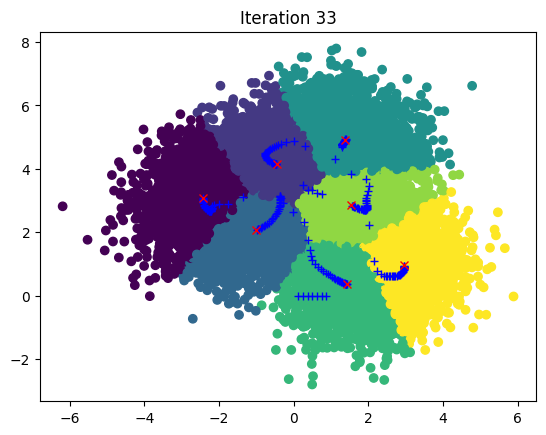

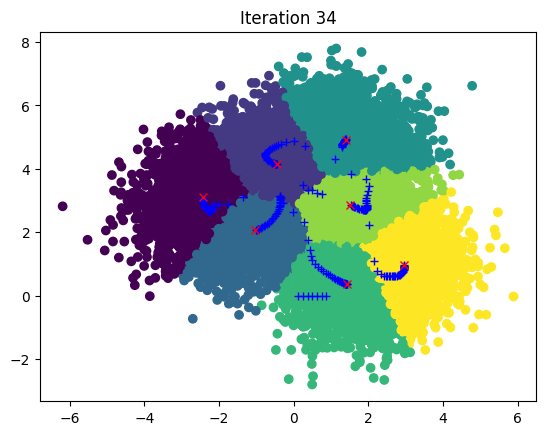

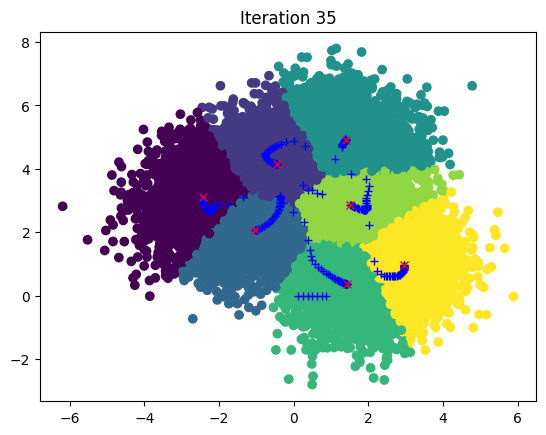

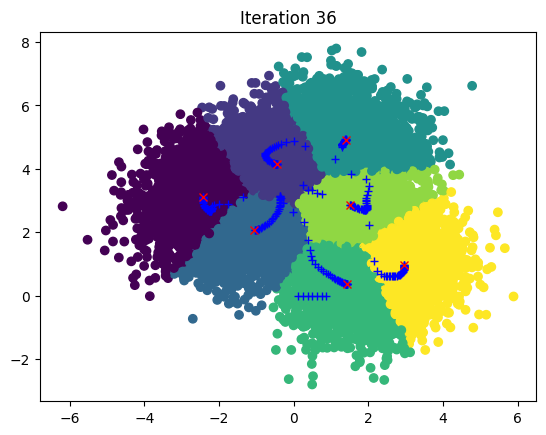

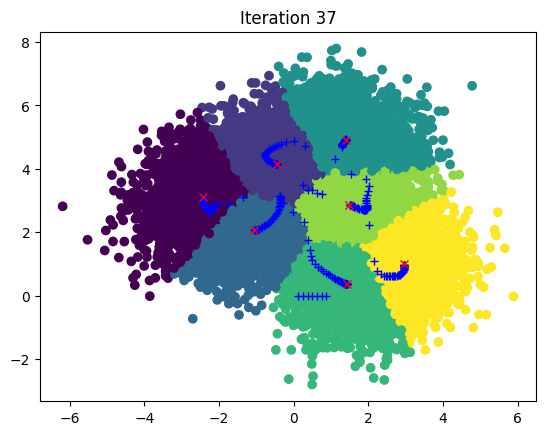

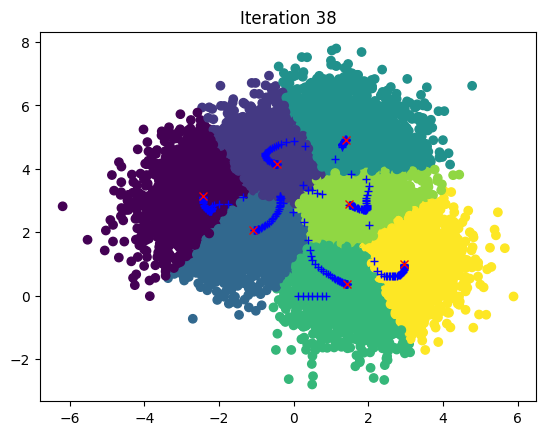

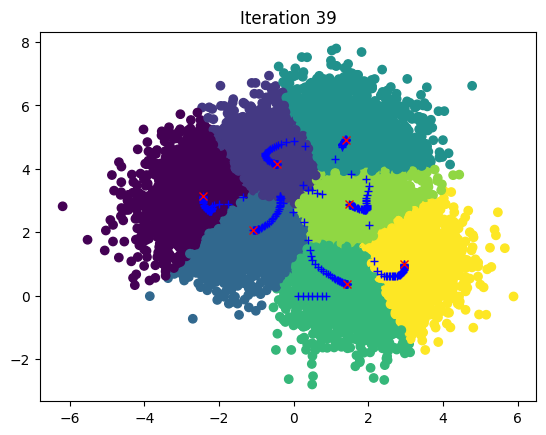

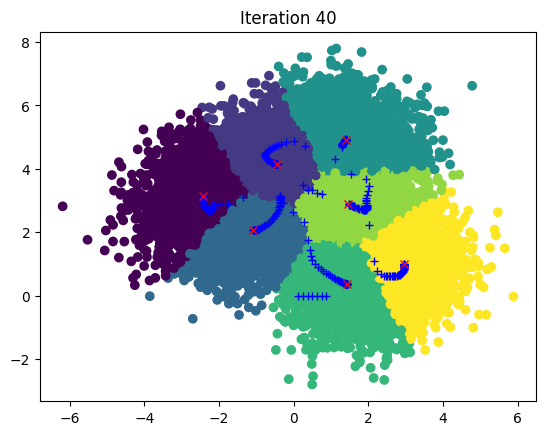

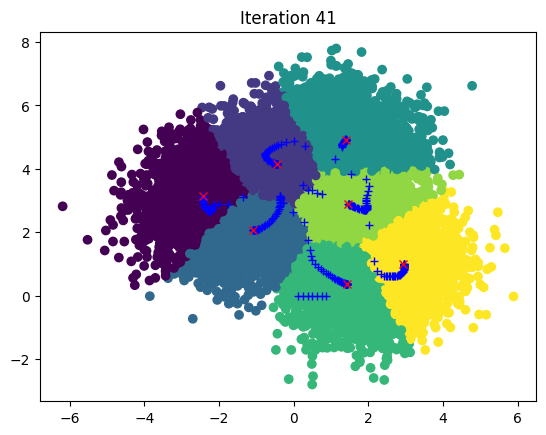

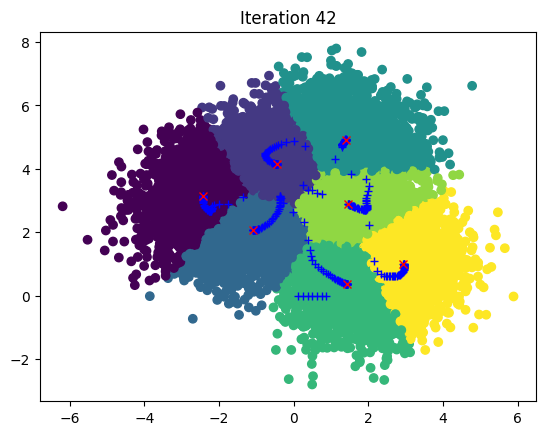

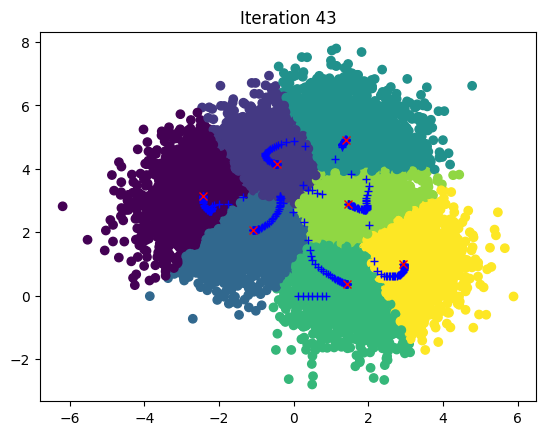

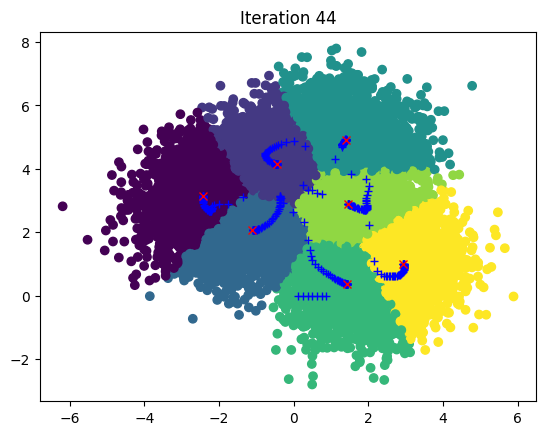

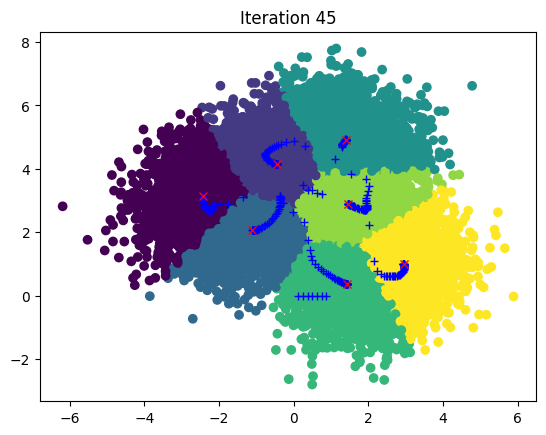

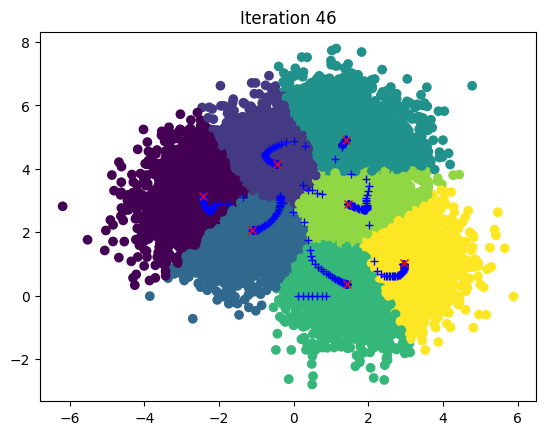

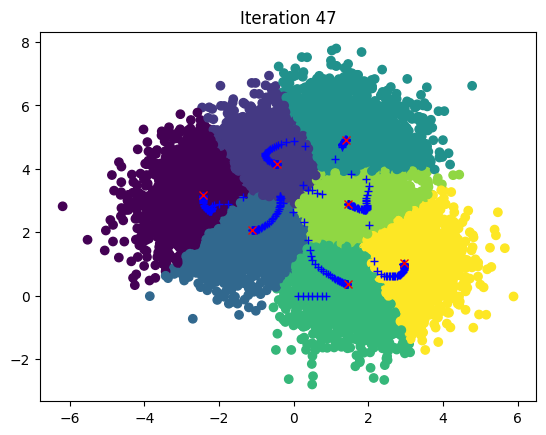

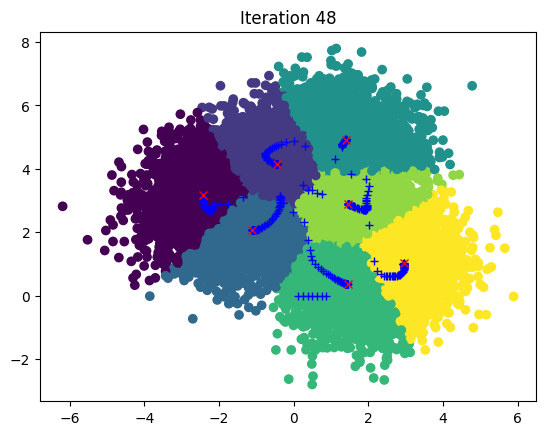

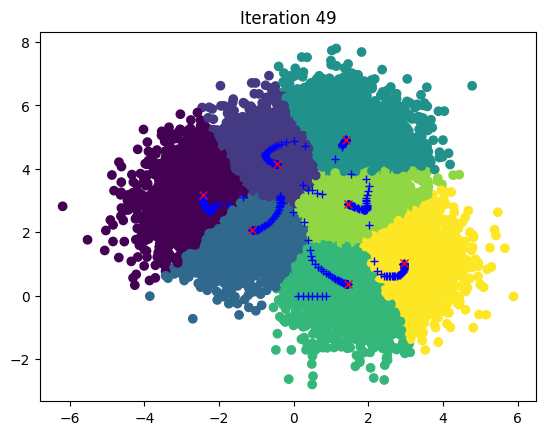

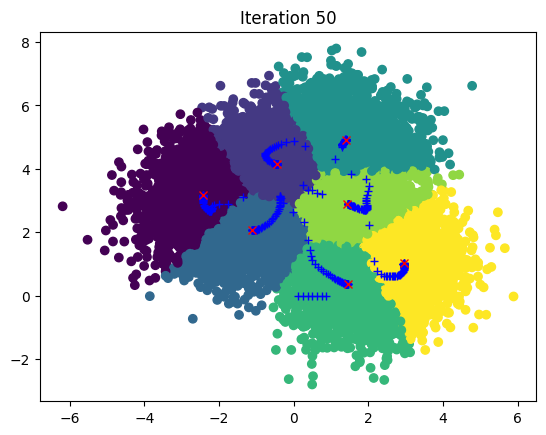

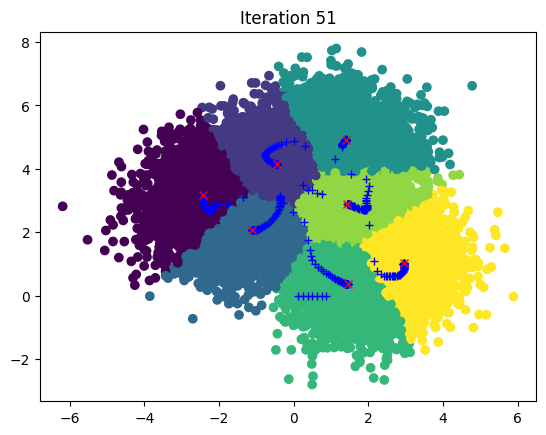

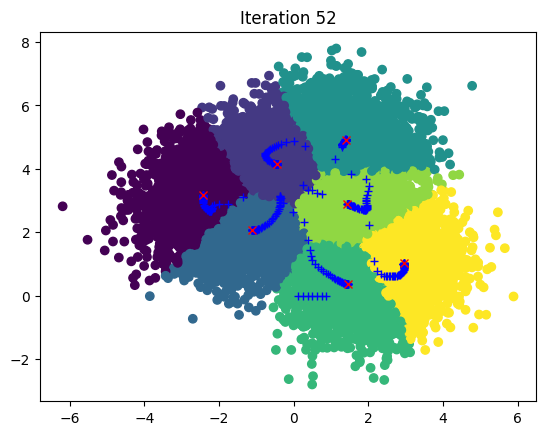

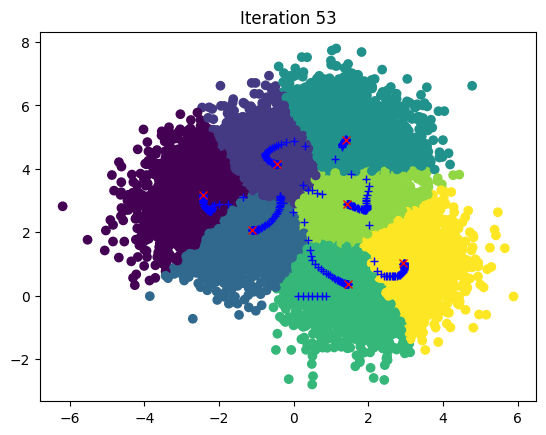

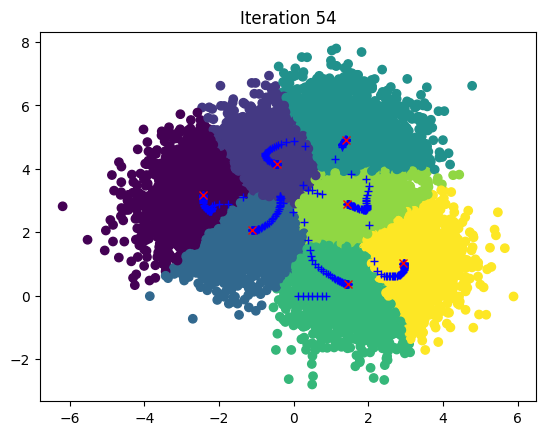

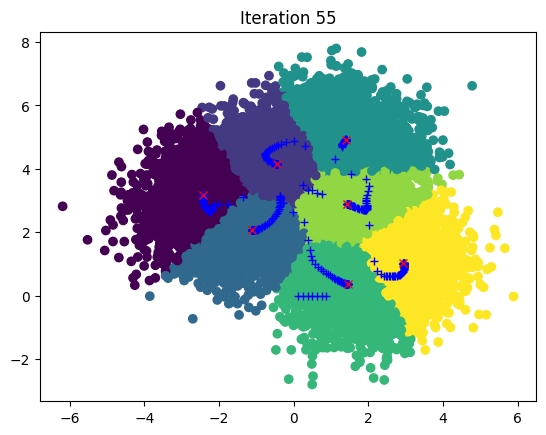

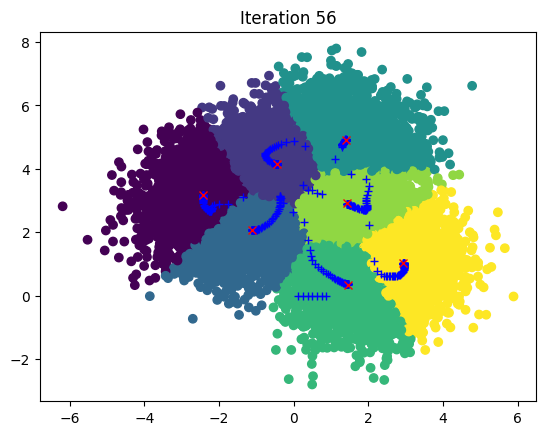

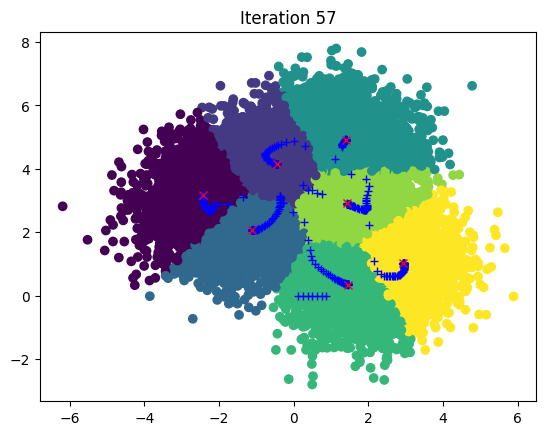

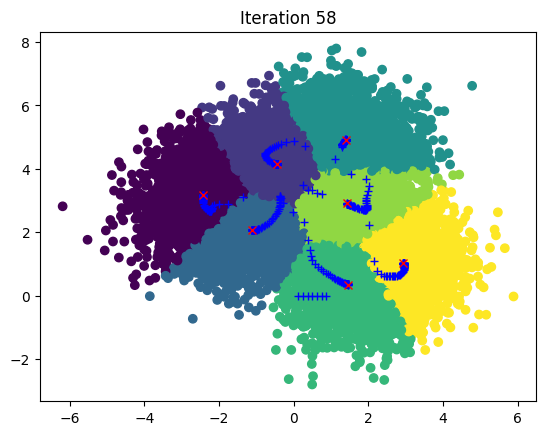

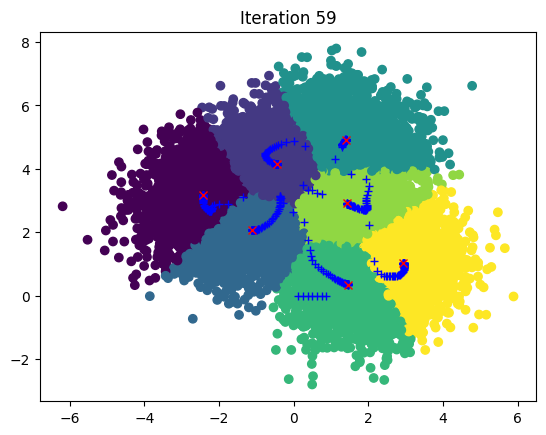

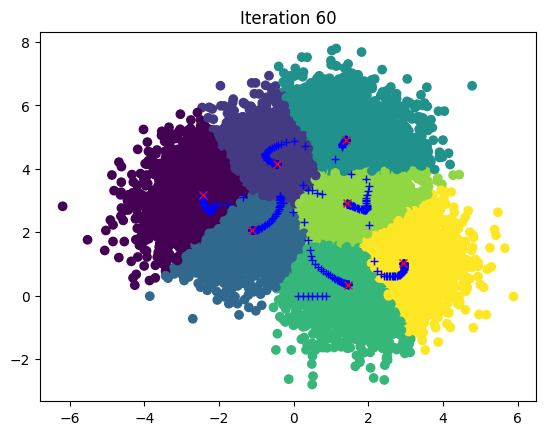

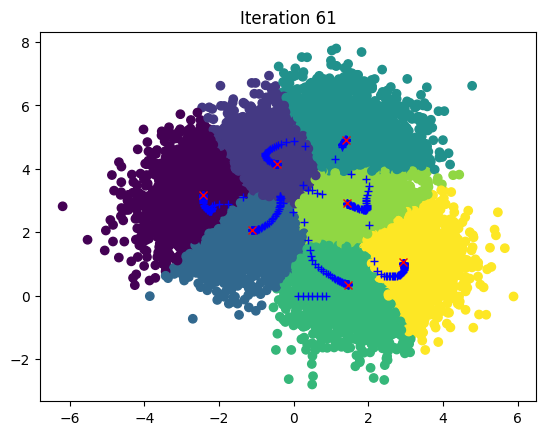

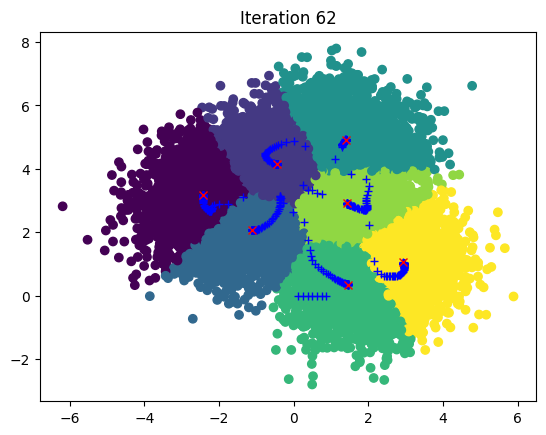

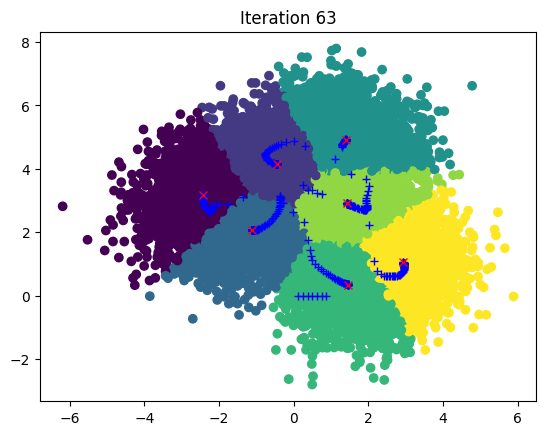

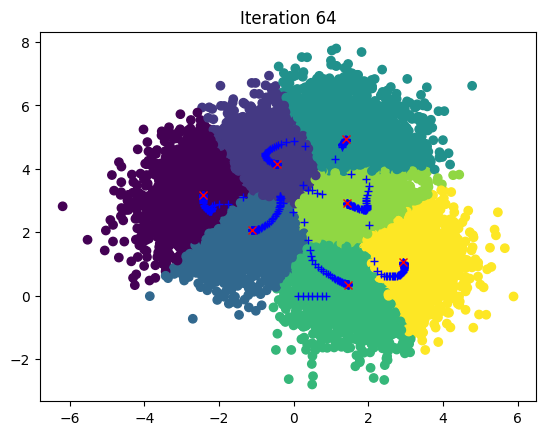

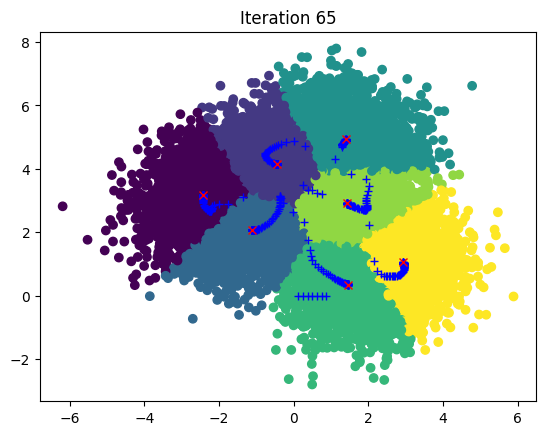

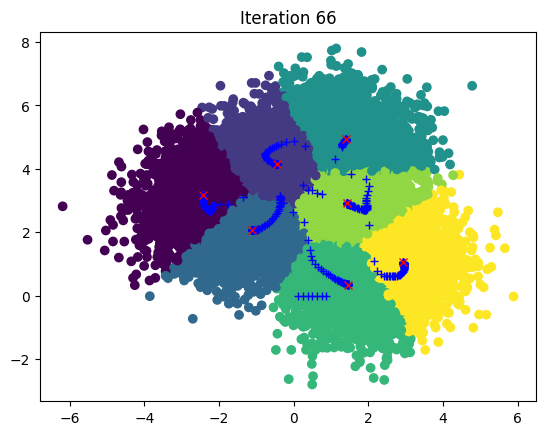

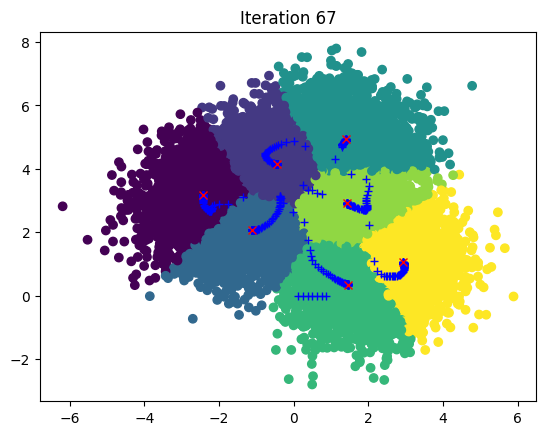

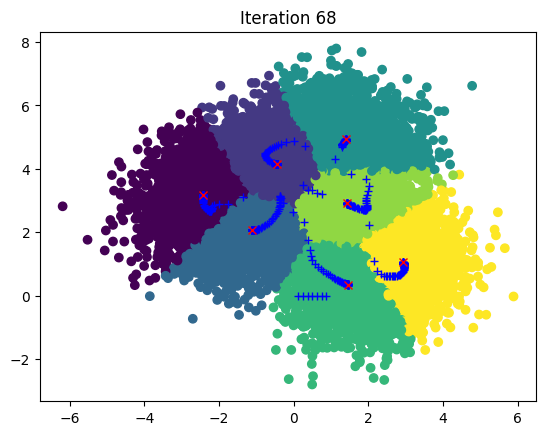

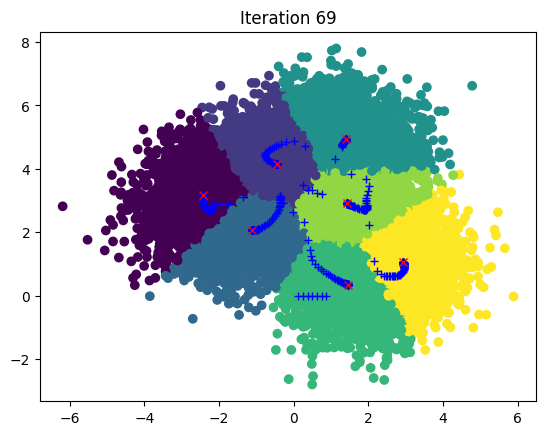

In [11]:
for itr in range(iteration+1):
    plt.scatter(dataset[:,0], dataset[:,1], c=history_of_clusters[itr])
    for l in range(itr):
        plt.plot(history_of_centers[l][:,0], history_of_centers[l][:,1], 'b+')
    plt.plot(history_of_centers[itr][:,0], history_of_centers[itr][:,1], 'rx')
    plt.title("Iteration "+str(itr))
    plt.show()

The algorithm indeed finds clusters of data points.

In [12]:
def calc_dispersion(datapoints, cluster, centers):
    dispersion = 0.0
    for i in range(centers.shape[0]):
        dispersion += np.sum( np.linalg.norm( datapoints[cluster==i, :] - centers[i,:], axis=1 ) )
    return dispersion

In [13]:
dispersion = calc_dispersion(dataset, history_of_clusters[-1], history_of_centers[-1])
print("The dispersion of the clustering is", dispersion)

The dispersion of the clustering is 17481.92541227376
